In [1]:
# Import Libraries
import random 
%matplotlib inline
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas_datareader import data as wb # for reading data from the web
from scipy import stats
import statsmodels.api as sm
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'

In [2]:
# create a random number
prob = random.random()
print(prob)

0.5326112382791491


In [3]:
# Creating random numbers for an array
num = np.random.randint(1,9,(4, 6))
print(num)

[[2 3 8 4 3 3]
 [6 2 6 7 1 6]
 [5 1 5 7 7 4]
 [8 7 4 5 7 7]]


In [4]:
# Read in yahoo data from free online financial sources
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [5]:
# Reading in only major companies adjusted closing value 
# PG = Procter and Gamble
# MSFT = Microsoft
# AT&T = T
# Ford = F
# General Electric = GE

companies = ['PG', 'MSFT', 'T', 'F', 'GE']
new_data= pd.DataFrame()
for company in companies:
    new_data[company] = wb.DataReader(company, 
                                      data_source='yahoo',
                                     start='1995-1-1')['Adj Close']
    
new_data

,PG,MSFT,T,F,GE
Date,,,,,
1995-01-03,8.261347,2.401030,5.528146,4.242091,4.062095
1995-01-04,8.195127,2.418484,5.551041,4.356228,4.062095
1995-01-05,8.079241,2.378592,5.637778,4.318182,4.072051
1995-01-06,8.095792,2.418484,5.637778,4.318182,4.052139
1995-01-09,8.062680,2.403525,5.620430,4.394274,4.012317
...,...,...,...,...,...
2020-10-02,138.119995,206.190002,28.162167,6.890000,6.390000
2020-10-05,139.389999,210.380005,28.152348,7.020000,6.410000
2020-10-06,139.610001,205.910004,28.191624,6.980000,6.170000


In [6]:
# Read in FRED/GDP data from quandl
data = quandl.get('FRED/GDP')
data

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2019-04-01,21329.877
2019-07-01,21540.325
2019-10-01,21747.394


### Calculate Rate of Return

In [7]:
# calculate security rate of return for each day 
# using the simpler formula ((today's price / yesterday's price)- 1)

PG['simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1))-1
PG

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,8.261347,NaN
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,8.195127,-0.008016
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,8.079241,-0.014141
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,8.095792,0.002049
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,8.062680,-0.004090
...,...,...,...,...,...,...,...
2020-10-02,139.119995,136.949997,137.929993,138.119995,6077900.0,138.119995,-0.008044
2020-10-05,139.649994,138.300003,138.720001,139.389999,6333900.0,139.389999,0.009195
2020-10-06,140.770004,138.809998,139.419998,139.610001,6042900.0,139.610001,0.001578


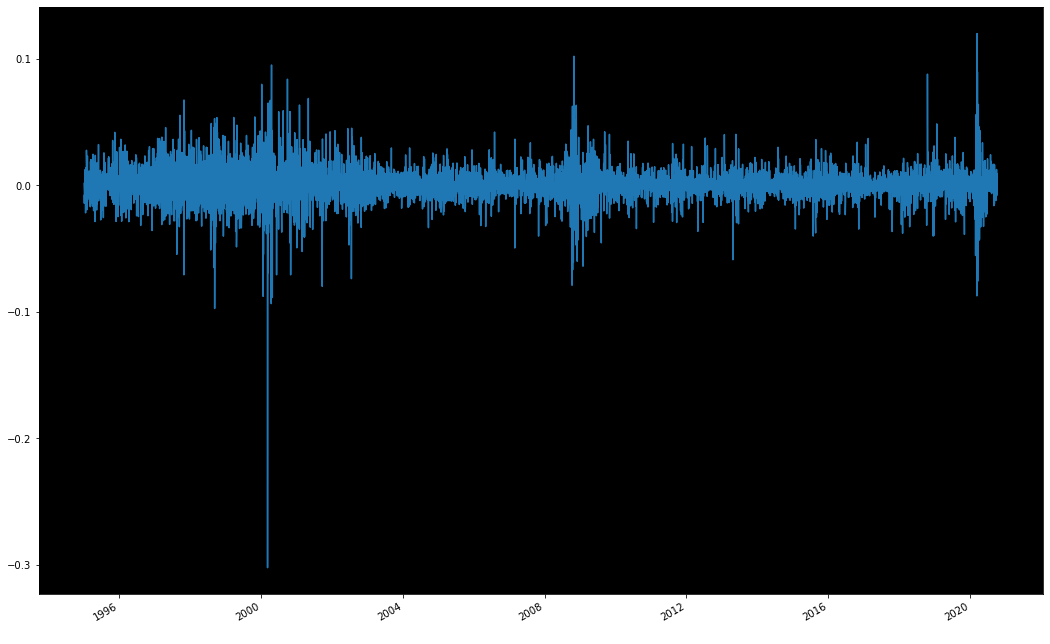

In [8]:
# Visualize the rate of return
PG['simple_return'].plot(figsize=(18, 12))
plt.show()

# Note: A fall in rate of return leads to a decrease in stock price, 
# while a rise in rate of return leads to an increase in stock price

In [9]:
# Calculate the average rate of return daily the whole period
daily_avg_rate_return = PG['simple_return'].mean()
daily_avg_rate_return

0.000540949473205826

In [10]:
# This is been multiplied by 250 because not all days are stocks bought and sold e.g saturday, sunday and holidays
annual_avg_rate_return = PG['simple_return'].mean()*250
annual_avg_rate_return

0.1352373683014565

In [11]:
# Convert this value to percentage - it is possible one have an average rate of return of 13.434% for that year 
percent_avg_rate_return = str(round(annual_avg_rate_return, 5) * 100) + '%'
print(percent_avg_rate_return)

13.524%


### Observing Historical Behaviour of Stocks(Assests)

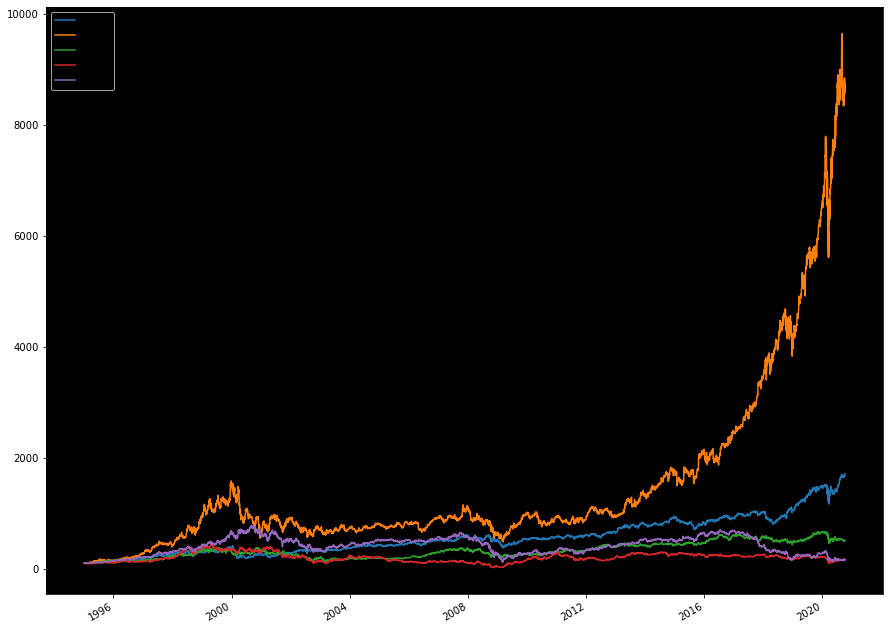

In [12]:
# Using new data a dataframe with multiple assests created above
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
(new_data/new_data.iloc[0] * 100).plot(figsize=(15, 12))
plt.show()
# Firstly, the first row would be normalised, so all stocks start from the same starting point


### Calculating the Return of Indices using Stock Indices

In [13]:
# Meaning of each stock
# S&P500 = '^GSPC', 
# NASDAQ = '^IXIC',
# GermanDAX ='^GDAXI'

stocks = ['^GSPC', '^IXIC', '^GDAXI']
stock_data = pd.DataFrame()
for stock in stocks:
    stock_data[stock] = wb.DataReader(stock, data_source='yahoo',
                                      start= '1997-1-1')['Adj Close']
stock_data.head(2)

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010


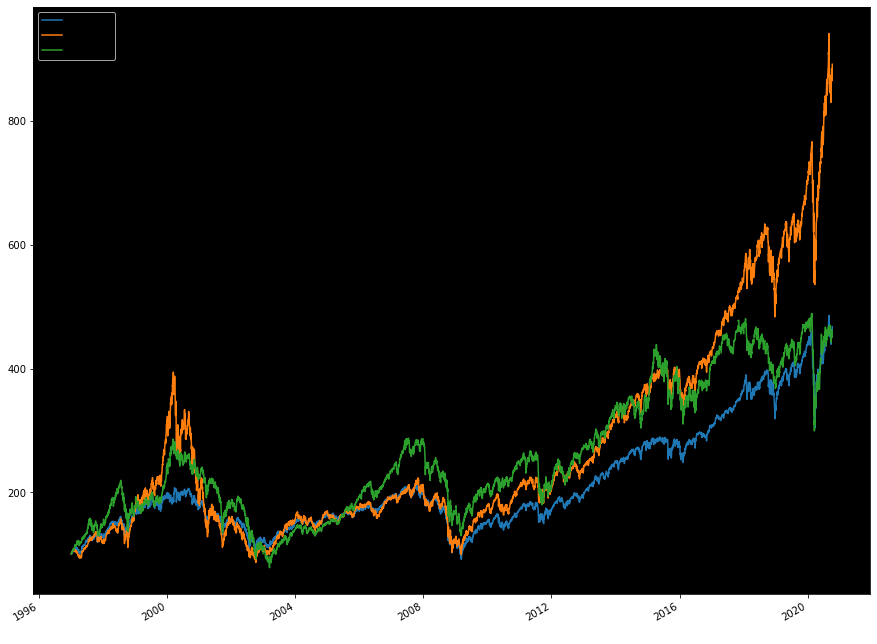

In [14]:
# View the behaviour of each stock
(stock_data/stock_data.iloc[0] * 100).plot(figsize=(15, 12))

In [15]:
# Calculating daily return
daily_stock_return = (stock_data/stock_data.shift(1))-1
daily_stock_return.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,NaN,NaN,NaN
1997-01-03,0.014952,0.023409,0.015049
1997-01-06,-0.000508,0.004364,0.009409
1997-01-07,0.007463,0.008607,-0.004795
1997-01-08,-0.006399,-0.005558,0.009644


In [16]:
# Calculating Annual average Return
annual_stock_return = daily_stock_return.mean()*250
annual_stock_return

^GSPC     0.083962
^IXIC     0.123335
^GDAXI    0.077506
dtype: float64

### Calculating the Risk of a Security

* The risk of a security can be calculated using both mean, variance and standard deviation

In [17]:
# Calculating returns of a security
returns_risk = (new_data/new_data.shift(1))-1
returns_risk.head(4)

,PG,MSFT,T,F,GE
Date,,,,,
1995-01-03,NaN,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.004142,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,0.015625,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,0.000000,-0.004890


In [18]:
# Calculating the mean annual returns
returns_risk[['PG', 'MSFT', 'T', 'F','GE']].mean() * 250

PG      0.135237
MSFT    0.222551
T       0.098064
F       0.100844
GE      0.070002
dtype: float64

In [19]:
# Calculating the risk (volatility) of a stock using standard deviation
returns_risk[['PG', 'MSFT', 'T', 'F','GE']].std() * 250 ** 0.5

PG      0.224744
MSFT    0.316804
T       0.263648
F       0.400402
GE      0.319703
dtype: float64

### Relationship between Securities

- This can be calculated using Covariance and Correlation

In [20]:
# Calculating annual covariance matrix between the five stocks returns
returns_risk[['PG', 'MSFT', 'T', 'F','GE']].cov()* 250

,PG,MSFT,T,F,GE
PG,0.050510,0.019445,0.020979,0.021345,0.025517
MSFT,0.019445,0.100365,0.028005,0.042488,0.042246
T,0.020979,0.028005,0.069510,0.033371,0.032754
F,0.021345,0.042488,0.033371,0.160322,0.056327
GE,0.025517,0.042246,0.032754,0.056327,0.102210


In [21]:
# Calculating correlation between the five stocks returns
returns_risk[['PG', 'MSFT', 'T', 'F','GE']].corr()

,PG,MSFT,T,F,GE
PG,1.000000,0.273104,0.354050,0.237197,0.355129
MSFT,0.273104,1.000000,0.335295,0.334952,0.417104
T,0.354050,0.335295,1.000000,0.316119,0.388587
F,0.237197,0.334952,0.316119,1.000000,0.440020
GE,0.355129,0.417104,0.388587,0.440020,1.000000


* Never annualize the correlation between returns

### Calculating Portfolio  Variance and Volatility
* All stocks presents in a portfolio should have a weight which would sum up to 1
* This weights would be used in calculating the portfolio's variance and volatility
* Lets assume the investor invested in the five stocks with the same amount of money - that    would be 1/5 = 0.2

* So meaning all stocks in the porfolios have the same weights


In [22]:
# Calculating portfolio's variance

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])# define weights for each portfolio

pfolio_var = np.dot(weights.T, np.dot(returns_risk.cov() * 250, weights))
pfolio_var

0.04511478344129317

In [23]:
# Porfolio Violability - the only difference is raise to power of 0.5

pfolio_vol = np.dot(weights.T, np.dot(returns_risk.cov() * 250, weights))**0.5
print("The percentage of volatility Risk of the portfolio",(str(round(pfolio_vol, 3)*100) + '%'))

The percentage of volatility Risk of the portfolio 21.2%


### Calculating DIversifiable and Non-Diversifiable Risk of a Portfolio

* To calculate this, a portfolio variance value would be needed for stocks in a portfolio. This we already computed above.


* DIVERSIFIABLE RISK

In [24]:
# Calculating the variance of each stock in the portfolio

var_list  = [] # an empty list to hold variances for each stock
stocks = returns_risk.columns.tolist()
for stock in stocks:
    globals()['var_%s' % stock] = returns_risk[stock].var() * 250 # Looping through each stock in the portfolio
    var_list.append(globals()['var_%s' % stock])
    
# Calculating weights for each stocks
weight_list = []
for position in range(len(stocks)):
    for stock in stocks:
        for var in var_list: 
            globals()['weight_%s' % stock] = (weights[position] ** 2 * var)
            weight_list.append(globals()['weight_%s' % stock])
weight_list = set(weight_list)
weighted = []
for i in weight_list:
    weighted.append(i)
# Subtrating weights from each other
length = len(weighted)
zero = 0
for i in range(len(weighted)-1):
    if i == 0:
        final_weight = weighted[zero]
        final_weight = final_weight - weighted[zero + 1]
        zero = zero + 1
        if zero < length:
            continue
        else:
            break
            
    else:
        final_weight = final_weight - weighted[zero + 1]
        zero = zero + 1
        if zero < length:
            continue  
        else:
            break
# Calculating diversifiable risk
DR = pfolio_var - final_weight
print(str(round(DR*100, 3)) + '%')       

5.625%


* NON-DIVERSIFIABLE RISK

In [25]:
# Non diversifiable risk is calculated by subtracting portfolio variance from diversifiable risk
NDR = pfolio_var - DR
print(str(round(NDR*100, 3)) + '%')   

-1.114%


### Calculating Ordinary Least Square Regression to determine the relationship between Explanatory variables & a dependent one
* The data used is an housing data that shows information about prices of houses, their sizes etc.

In [26]:
# load in dataset
data = pd.read_excel("C:/Data Science Videos/finance_1.xlsx")

In [27]:
# Calulating OLS
X = data['House Price']
y = data['House Size (sq.ft.)']
X1 = sm.add_constant(X)
reg = sm.OLS(y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     House Size (sq.ft.)   R-squared:                       0.678
Model:                             OLS   Adj. R-squared:                  0.660
Method:                  Least Squares   F-statistic:                     37.95
Date:                 Fri, 09 Oct 2020   Prob (F-statistic):           8.13e-06
Time:                         00:20:43   Log-Likelihood:                -136.62
No. Observations:                   20   AIC:                             277.2
Df Residuals:                       18   BIC:                             279.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          23.8602    236.227      0.101      0.921    -472.434     520.154
House Price     0.0017      0.000      6.160      0.000       0.001       0.002
==============================================================================
Omnibus:                        9.331   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                6.893
Skew:                           1.070   Prob(JB):                       0.0319
Kurtosis:                       4.921   Cond. No.                     3.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Obtaining Efficient Frontier of Securities(stocks) in a Portfolio

In [28]:
# Calculating log return of each security
log_return = np.log(new_data/new_data.shift(1))
log_return.head()

,PG,MSFT,T,F,GE
Date,,,,,
1995-01-03,NaN,NaN,NaN,NaN,NaN
1995-01-04,-0.008048,0.007243,0.004133,0.026550,0.000000
1995-01-05,-0.014242,-0.016632,0.015504,-0.008772,0.002448
1995-01-06,0.002046,0.016632,0.000000,0.000000,-0.004902
1995-01-09,-0.004098,-0.006205,-0.003082,0.017468,-0.009876


In [29]:
# Calculating mean annual returna and annual covariance between covariances
print("mean annual return", log_return.mean()*250)
print("")
print("Covariance between Annual Securities")
log_return.cov()*250

mean annual return PG      0.109501
MSFT    0.172394
T       0.063344
F       0.021179
GE      0.018993
dtype: float64

Covariance between Annual Securities


,PG,MSFT,T,F,GE
PG,0.051984,0.019294,0.020992,0.021458,0.025659
MSFT,0.019294,0.100165,0.027878,0.042564,0.042303
T,0.020992,0.027878,0.069414,0.033370,0.032824
F,0.021458,0.042564,0.033370,0.159149,0.056475
GE,0.025659,0.042303,0.032824,0.056475,0.102011


In [30]:
# Correlation between Securities in the portfolio
log_return.corr()

,PG,MSFT,T,F,GE
PG,1.000000,0.267376,0.349467,0.235918,0.352362
MSFT,0.267376,1.000000,0.334338,0.337119,0.418492
T,0.349467,0.334338,1.000000,0.317487,0.390072
F,0.235918,0.337119,0.317487,1.000000,0.443229
GE,0.352362,0.418492,0.390072,0.443229,1.000000


In [31]:
# Calculating random weights
num_assest = 2
weights = np.random.random(num_assest)
weights /= np.sum(weights)
weights

array([0.80710538, 0.19289462])

In [32]:
# Use only two stocks (PG and MSFT)
log_return = log_return[['PG', 'MSFT']]
log_return

,PG,MSFT
Date,,
1995-01-03,NaN,NaN
1995-01-04,-0.008048,0.007243
1995-01-05,-0.014242,-0.016632
1995-01-06,0.002046,0.016632
1995-01-09,-0.004098,-0.006205
...,...,...
2020-10-02,-0.008076,-0.029956
2020-10-05,0.009153,0.020117
2020-10-06,0.001577,-0.021476


In [33]:
# Calcualting portfolio returns and volatilities


pfolio_returns = []
pfolio_volatility = []
for x in range(1000):
    weights = np.random.random(num_assest)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_return.mean()) * 250)
    pfolio_volatility.append(np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*250, weights))))

# Convert the values to array and add them to a dataframe

pfolio_returns = np.array(pfolio_returns)
pfolio_volatility = np.array(pfolio_volatility)

portfolio = pd.DataFrame({'Return': pfolio_returns,'Volatility': pfolio_volatility})
portfolio.head()
                      

,Return,Volatility
0,0.137164,0.212594
1,0.172368,0.316382
2,0.131548,0.207412
3,0.134862,0.209965
4,0.163696,0.282787


Text(0, 0.5, 'Expected Return')

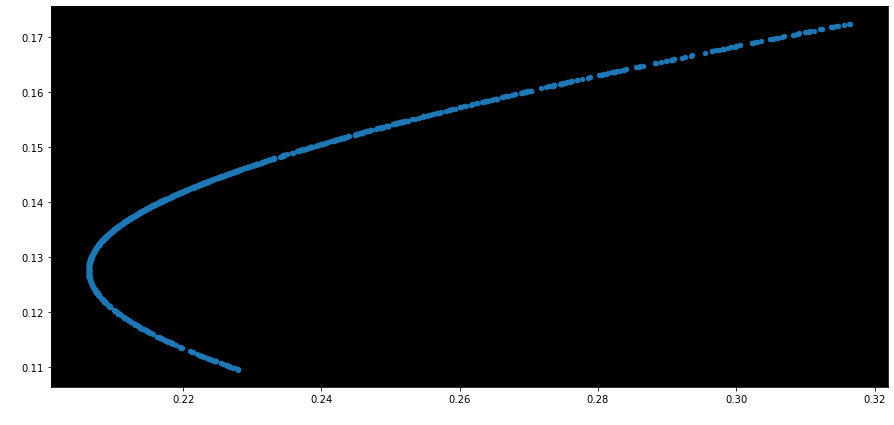

In [34]:
# visulaize the Efficient Frontier of the porfolio
portfolio.plot(x= 'Volatility', y = 'Return', kind= 'scatter', figsize=(15, 7))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

#### Calculating the Beta of a Stock Against the Market